In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
c=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')

In [66]:
c

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [67]:
!pip install wordcloud

In [68]:
from wordcloud import WordCloud,STOPWORDS

Text(0.5, 1.0, 'most used words')

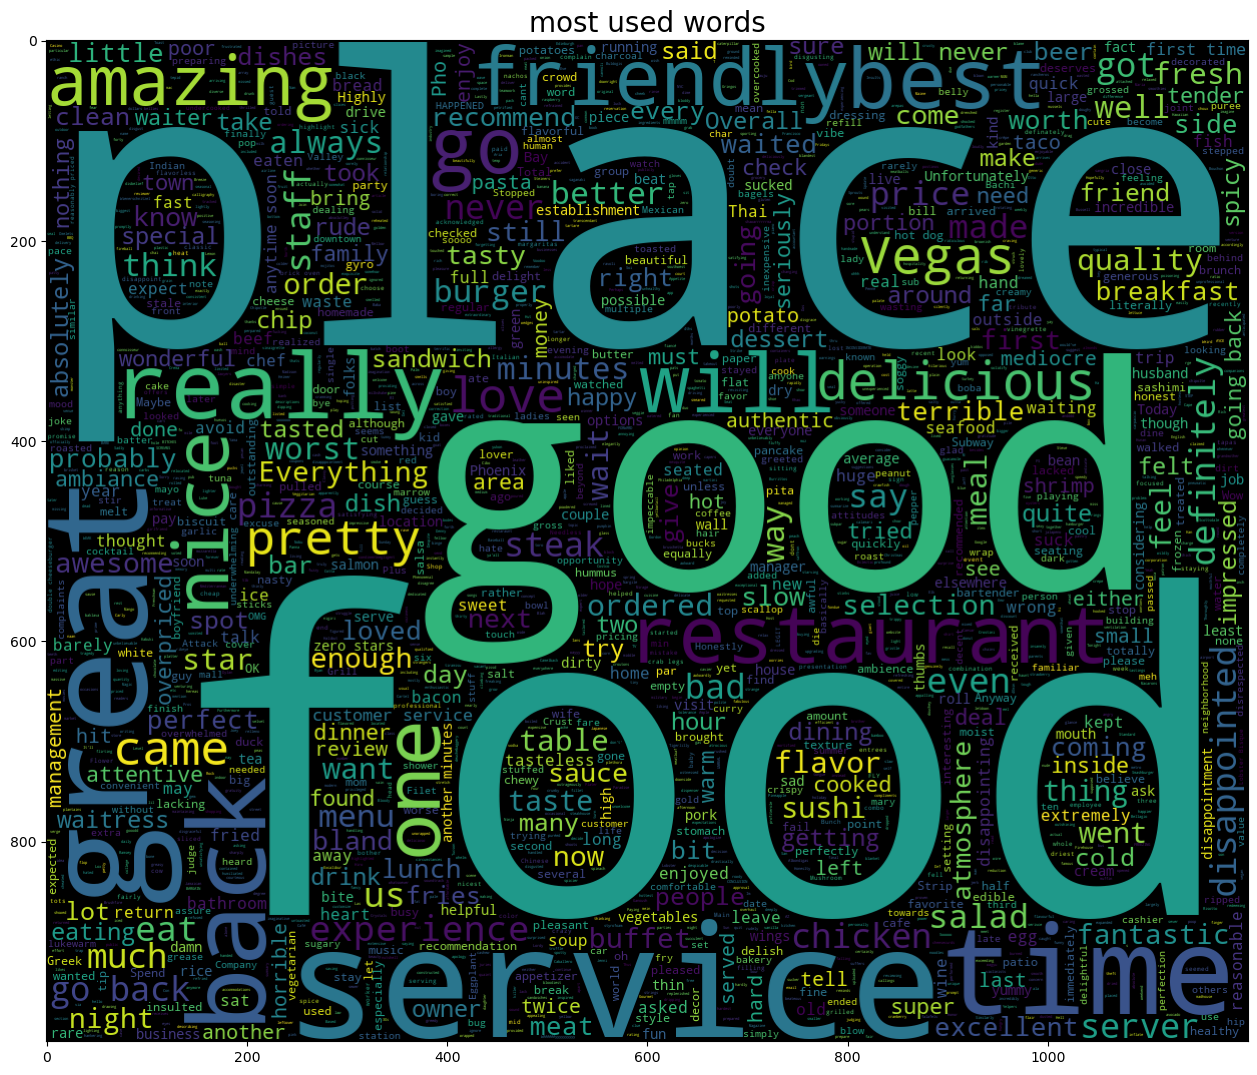

In [69]:
plt.figure(figsize=(16,13))
wordcloud=WordCloud(background_color='black',max_words=5000,height=1000,width=1200,stopwords=STOPWORDS).generate(' '.join(c['Review']))
plt.imshow(wordcloud.recolor(colormap='viridis'))
plt.title('most used words',fontsize=20)

In [70]:
positive_reviews=c.loc[c['Liked']==1]['Review']

In [71]:
positive_reviews

0                               Wow... Loved this place.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
8                              The fries were great too.
9                                         A great touch.
                             ...                        
899                         Overall, a great experience.
901    Their regular toasted bread was equally satisf...
907    The chips and sals a here is amazing!!!!!!!!!!...
909                This is my new fav Vegas buffet spot.
922    Every time I eat here, I see caring teamwork t...
Name: Review, Length: 500, dtype: object

Text(0.5, 1.0, 'positive reviews')

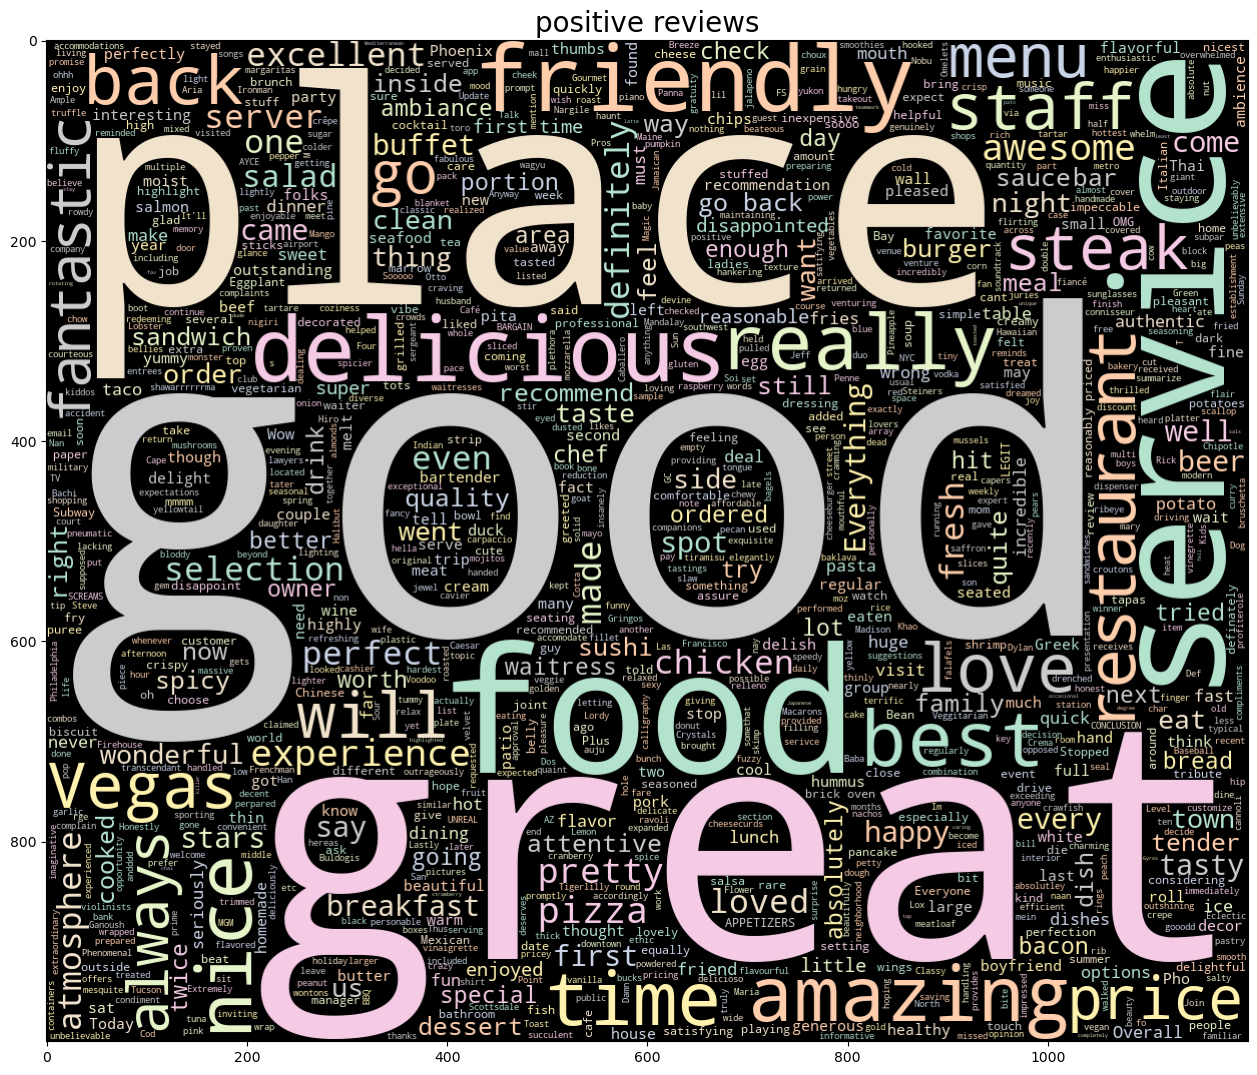

In [72]:
plt.figure(figsize=(16,13))
wordcloud=WordCloud(background_color='black',max_words=5000,height=1000,width=1200,stopwords=STOPWORDS).generate(' '.join(positive_reviews))
plt.imshow(wordcloud.recolor(colormap='Pastel2'))
plt.title('positive reviews',fontsize=20)

In [73]:
negative_reviews=c.loc[c['Liked']==0]['Review']

In [74]:
negative_reviews

1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 500, dtype: object

Text(0.5, 1.0, 'negative reviews')

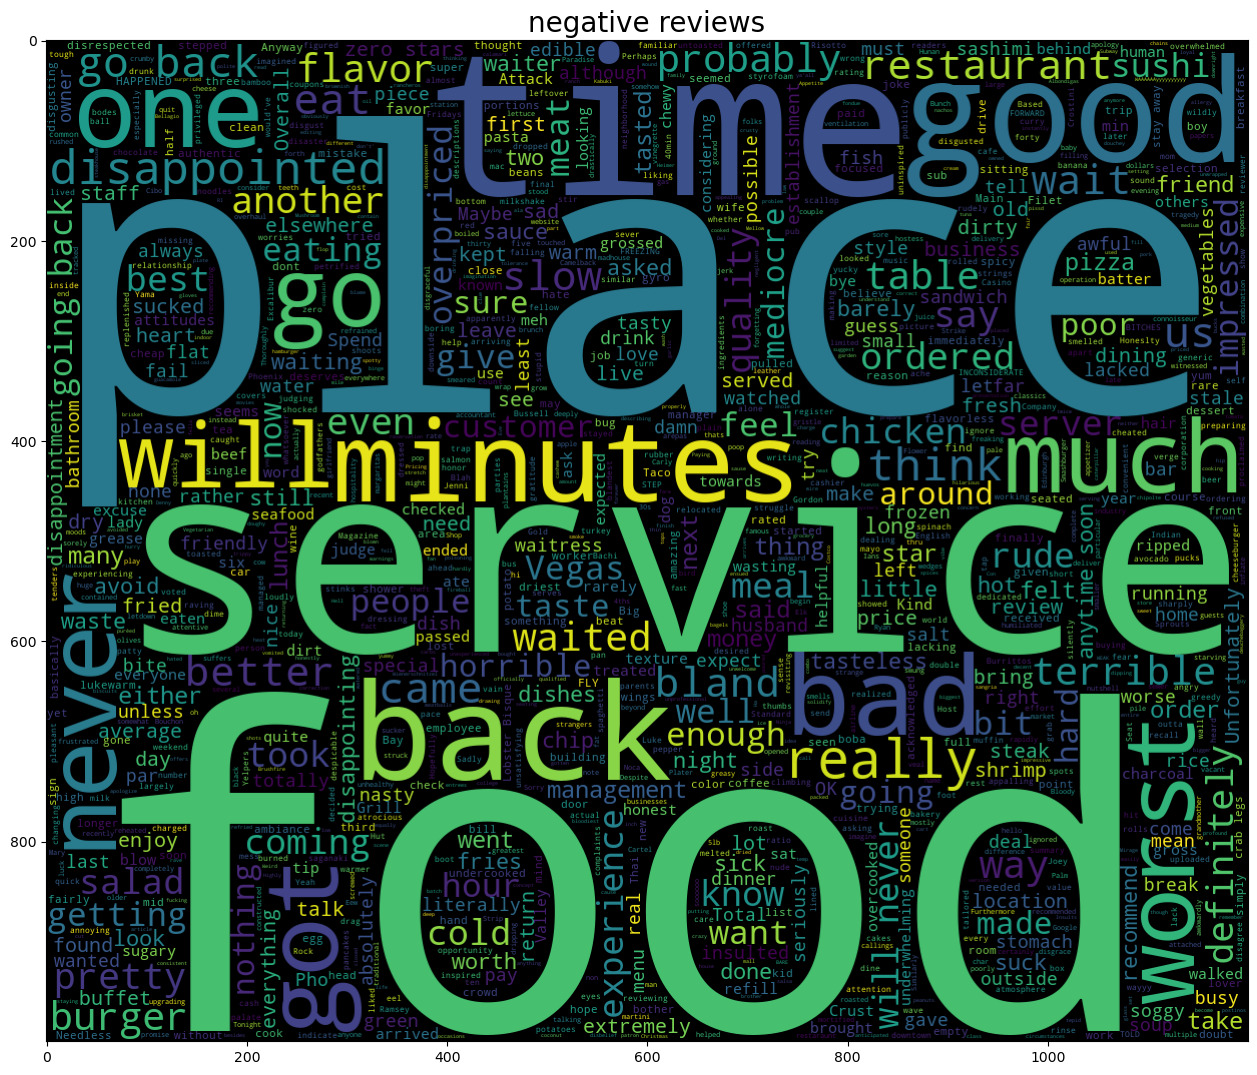

In [75]:
plt.figure(figsize=(16,13))
wordcloud=WordCloud(background_color='black',max_words=5000,height=1000,width=1200,stopwords=STOPWORDS).generate(' '.join(negative_reviews))
plt.imshow(wordcloud.recolor(colormap='viridis'))
plt.title('negative reviews',fontsize=20)

In [76]:
from nltk.corpus import stopwords

In [77]:
import re

In [78]:
from nltk.stem.porter import PorterStemmer

In [79]:
lis=[]

In [80]:
import nltk

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahame\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahame\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
from nltk.stem import WordNetLemmatizer
s=WordNetLemmatizer()

In [84]:
for i in range(0,1000):
 reviews=re.sub('[^a-zA-Z]',' ',c['Review'][i])
 reviews=reviews.lower()
 reviews=reviews.split()
 stop=stopwords.words('english')
 stop.remove('not')
 reviews=[s.lemmatize(label) for label in reviews if not label in set(stop)]
 reviews=' '.join(reviews)
 lis.append(reviews)



In [85]:
lis

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'a

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
v=CountVectorizer()

In [88]:
lis=v.fit_transform(lis)

In [89]:
lis

<1000x1767 sparse matrix of type '<class 'numpy.int64'>'
	with 5469 stored elements in Compressed Sparse Row format>

In [90]:
x=lis.toarray()
y=c.iloc[:,-1]

In [91]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [92]:
y


0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
model=GaussianNB()

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [97]:
model.fit(x_train,y_train)

GaussianNB()

In [98]:
predict=model.predict(x_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62       102
           1       0.62      0.85      0.72        98

    accuracy                           0.68       200
   macro avg       0.70      0.68      0.67       200
weighted avg       0.70      0.68      0.67       200



In [101]:
con=confusion_matrix(y_test,predict)

Text(50.722222222222214, 0.5, 'actual')

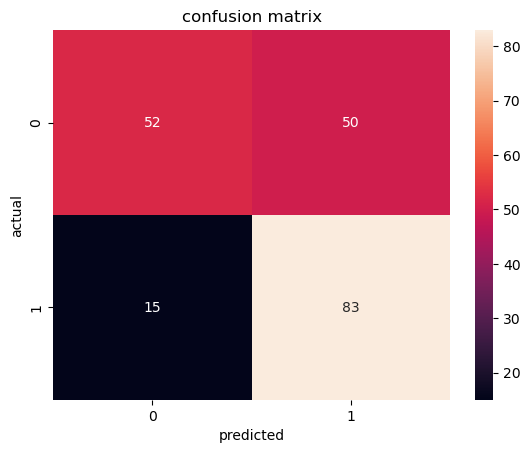

In [102]:
sns.heatmap(con,annot=True,fmt='d')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')

In [103]:
print(accuracy_score(y_test,predict))

0.675


In [104]:
from sklearn.svm import SVC

In [105]:
model1=SVC(kernel='rbf',random_state=3)

In [106]:
model1.fit(x_train,y_train)

SVC(random_state=3)

In [107]:
predict1=model1.predict(x_test)

In [108]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.84      0.80      0.82        98

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [109]:
print(confusion_matrix(y_test,predict1))

[[87 15]
 [20 78]]


In [110]:
print(accuracy_score(y_test,predict1))

0.825


In [111]:
con1=confusion_matrix(y_test,predict1)

Text(50.722222222222214, 0.5, 'actual')

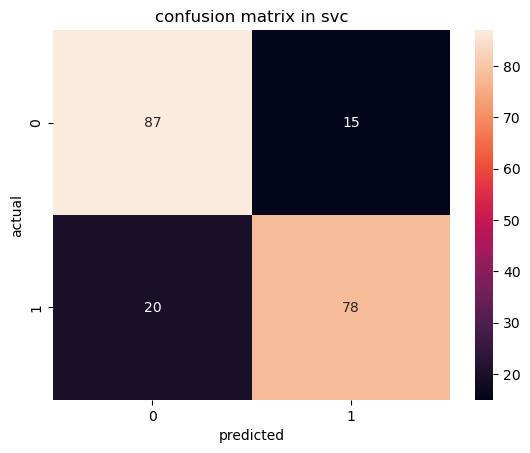

In [112]:
sns.heatmap(con1,annot=True,fmt='d')
plt.title('confusion matrix in svc')
plt.xlabel('predicted')
plt.ylabel('actual')